# 2.1. Деревья решений. Классификация

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('adult.csv')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['income'])
le.classes_
le.transform(['<=50K', '>50K'])
df_new = pd.Series(le.transform(df['income'] ) )
df_new.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [9]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
X = df[['age','educational-num','marital-status','relationship']]
y = pd.get_dummies(df[['income']])


In [11]:
print(df.shape)
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
data=pd.get_dummies(X,columns=['marital-status','relationship'])
data.head()

,age,educational-num,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,0,0,0,0,1,0,0,0,0,0,1,0,0
1,38,9,0,0,1,0,0,0,0,1,0,0,0,0,0
2,28,12,0,0,1,0,0,0,0,1,0,0,0,0,0
3,44,10,0,0,1,0,0,0,0,1,0,0,0,0,0
4,18,10,0,0,0,0,1,0,0,0,0,0,1,0,0


In [13]:
dt = pd.concat([data,y], axis=1)
dt

,age,educational-num,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,income_<=50K,income_>50K
0,25,7,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,38,9,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,28,12,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,44,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,18,10,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
48838,40,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
48839,58,9,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
48840,22,9,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


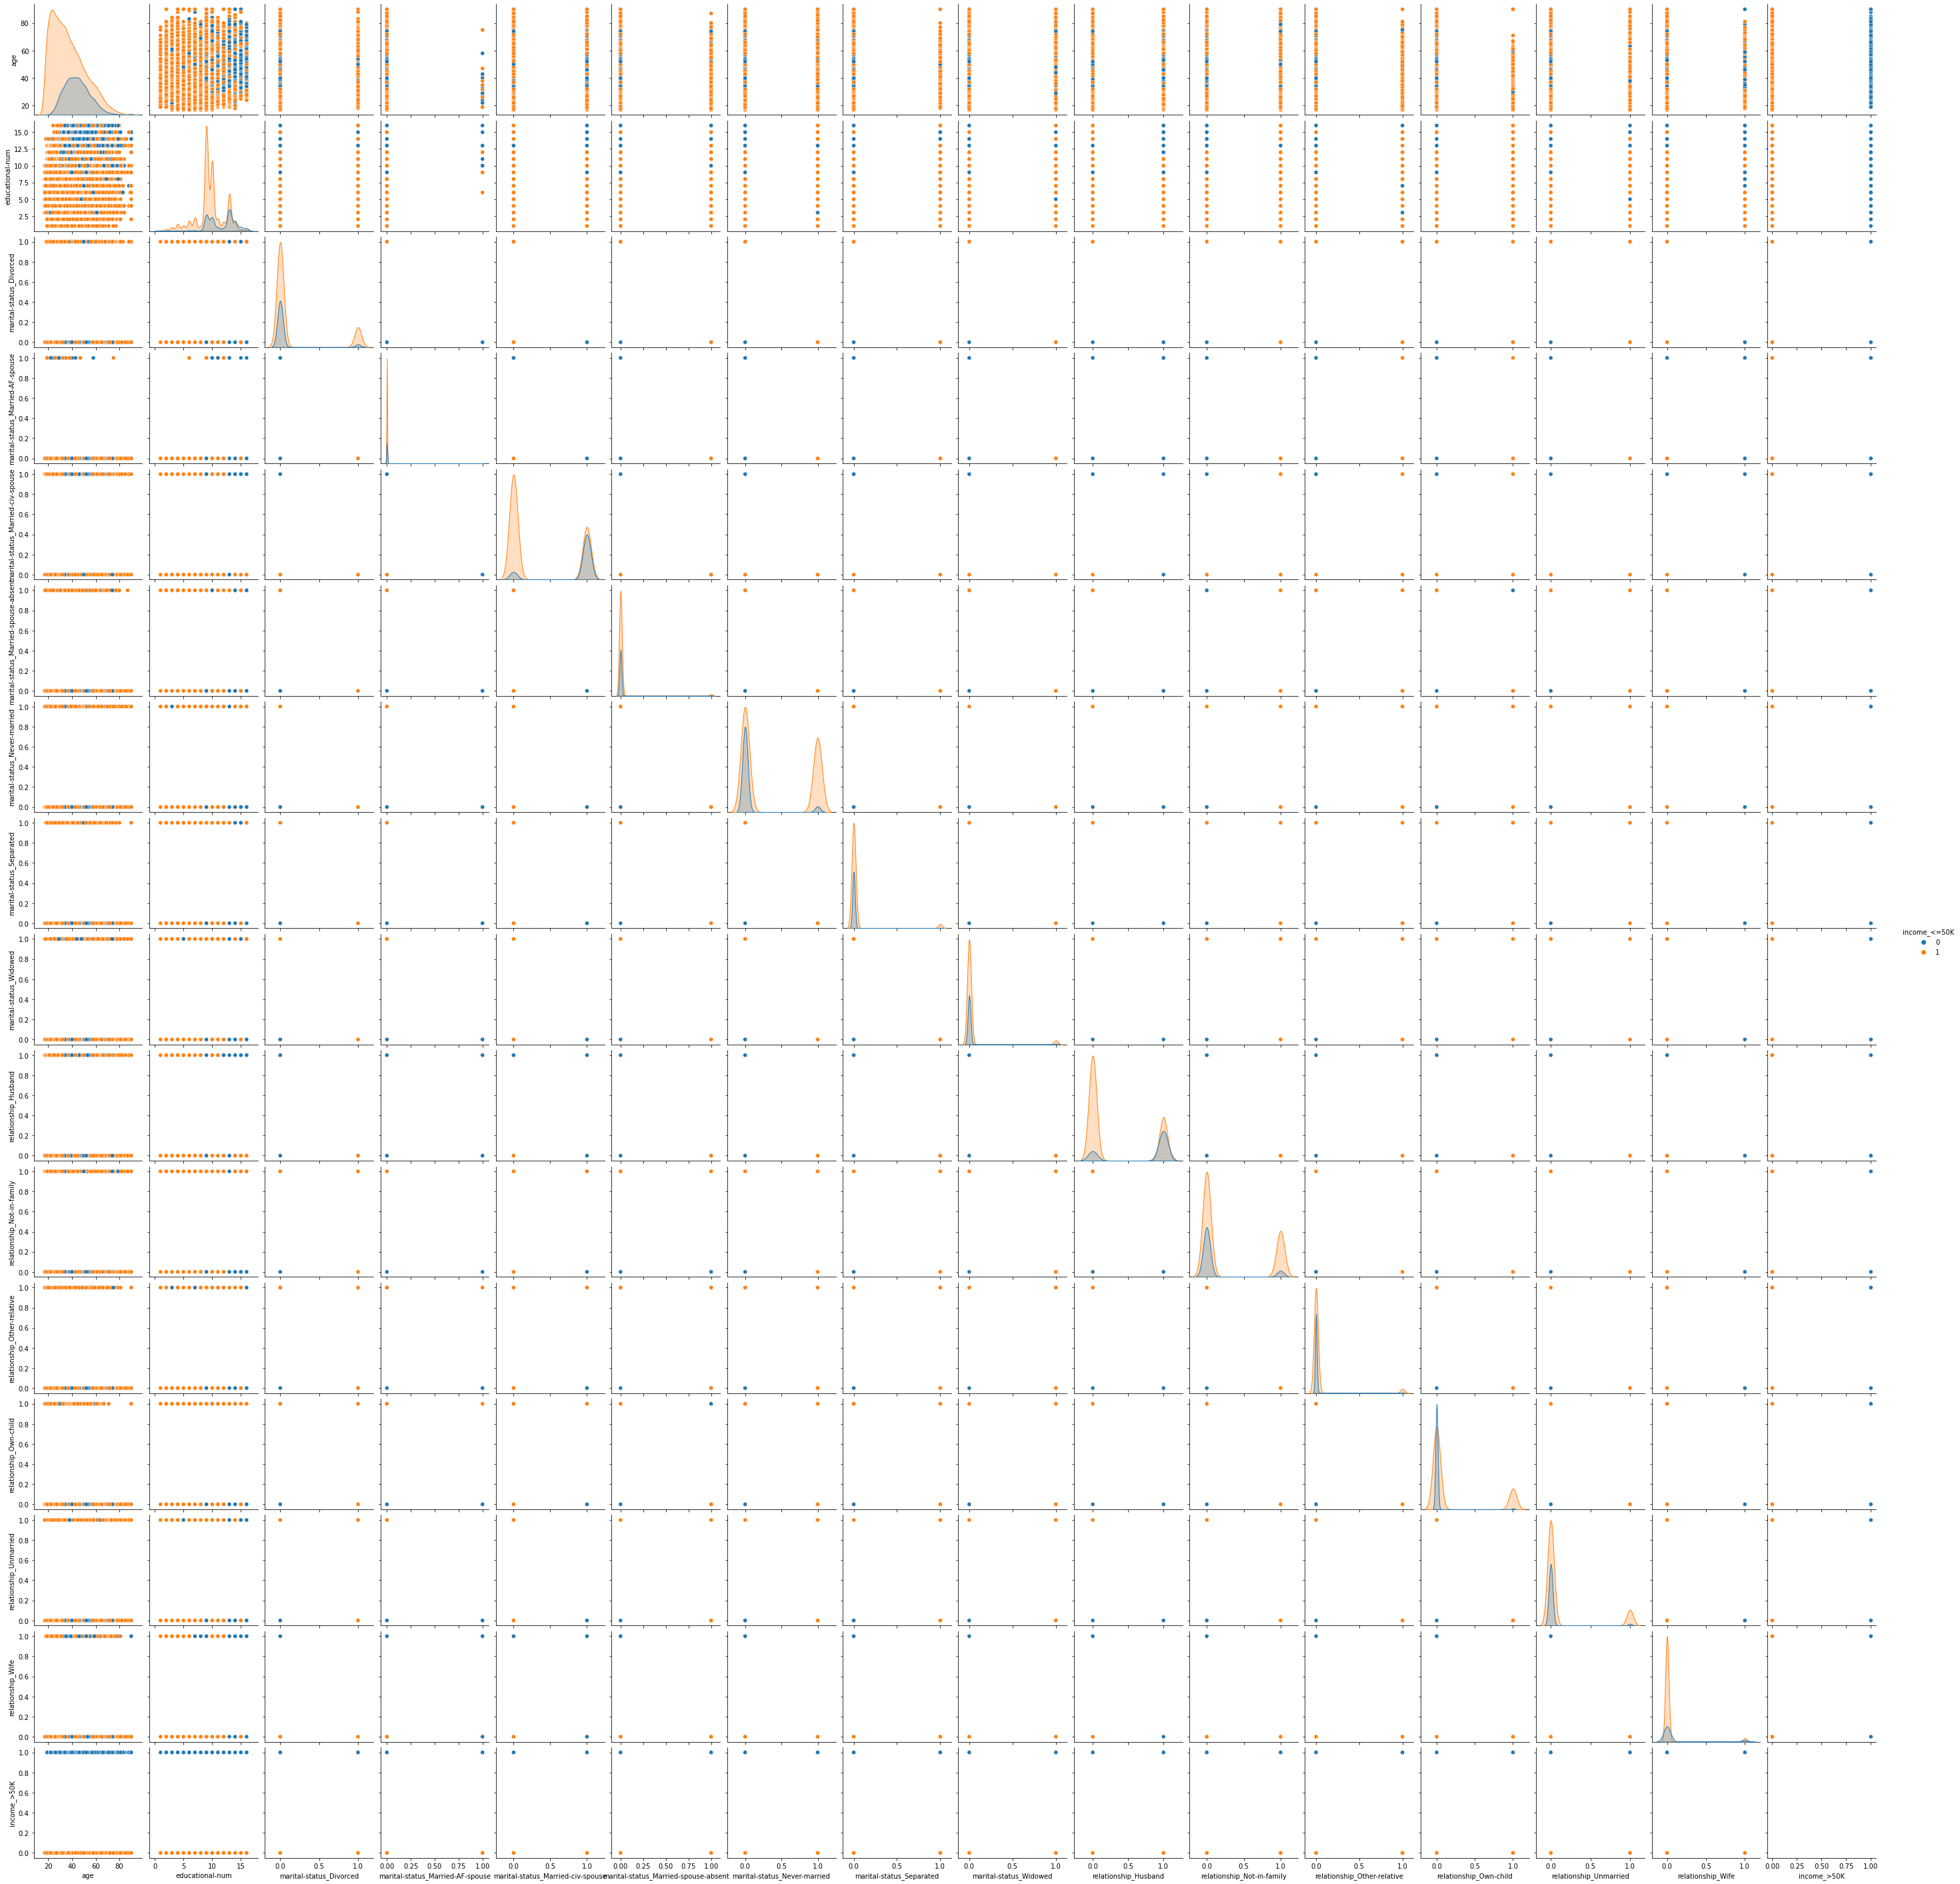

In [16]:
sns.pairplot(dt, hue='income_<=50K', diag_kind="kde")

#### 2. Используем классификатор

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
# DecisionTreeClassifier

In [141]:
clf = DecisionTreeClassifier(max_depth=2)

In [142]:
clf.fit(data, y)

DecisionTreeClassifier(max_depth=2)

In [143]:
clf.predict(data)

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [144]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [145]:
clf.predict_proba(data)

[array([[0.04818503, 0.95181497],
        [0.33085194, 0.66914806],
        [0.33085194, 0.66914806],
        ...,
        [0.04818503, 0.95181497],
        [0.04818503, 0.95181497],
        [0.33085194, 0.66914806]]),
 array([[0.95181497, 0.04818503],
        [0.66914806, 0.33085194],
        [0.66914806, 0.33085194],
        ...,
        [0.95181497, 0.04818503],
        [0.95181497, 0.04818503],
        [0.66914806, 0.33085194]])]

Визуализируем границу принятия решений. Для удобства все упаковано в функцию **test_clf**, в неё передаётся созданный классификатор и при установленном fit_clf=True обучается внутри, а затем отрисовывает границу. Таким образом можно экспериментировать с параметрами классификатора

In [146]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [147]:
def test_clf(clf, X, y,cy=0, fit_clf=False):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap='Pastel1')
    plt.scatter(X.values[:, 0], X.values[:, 1], s=100, cmap='tab10',c=cy)
    if fit_clf:
        return clf

In [119]:
y

,income_<=50K,income_>50K
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
48837,1,0
48838,0,1
48839,1,0
48840,1,0


In [120]:
Xcut=data[['age','educational-num']]

*попробуйте при разной глубине*

In [148]:
clf = test_clf(DecisionTreeClassifier(), Xcut, y,cy=df_new, fit_clf=True)

ValueError: cannot reshape array of size 25500000 into shape (1700,7500)

In [150]:
import numpy as np
import pandas as pd

In [149]:
clf.feature_importances_

array([0.        , 0.31485774, 0.        , 0.        , 0.68514226,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [151]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [152]:
get_tree_dot_view(clf, list(Xcut.columns), df_new)

NameError: name 'get_tree_dot_view' is not defined

-----

**Задание**
1. визуализировать дерево
2. вставить скрин с картинкой сюда в ipython notebook (!\[text](imagename.png))
3. проверить индексы Джини в узлах: совпадают с нашей расчётной функцией?
4. ветка налево - это True или False? что значит цвет узла? class? values?

-----

## 3. DecisionTreeRegressor

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [ ]:
# Fit regression model
list_depth = [1,2,3,4,5,7]
dt_regs = {}
for i in list_depth:
    dt_regs[f'depth={i}'] = DecisionTreeRegressor(max_depth=i).fit(X, y)
dt_regs['depth=inf'] = DecisionTreeRegressor().fit(X, y)
dt_regs['reg'] = DecisionTreeRegressor(min_samples_leaf=3, criterion='mae').fit(X, y)

In [ ]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

pred_list = {}
for key, cur_dt_reg in dt_regs.items():
      pred_list[key] = cur_dt_reg.predict(X_test)

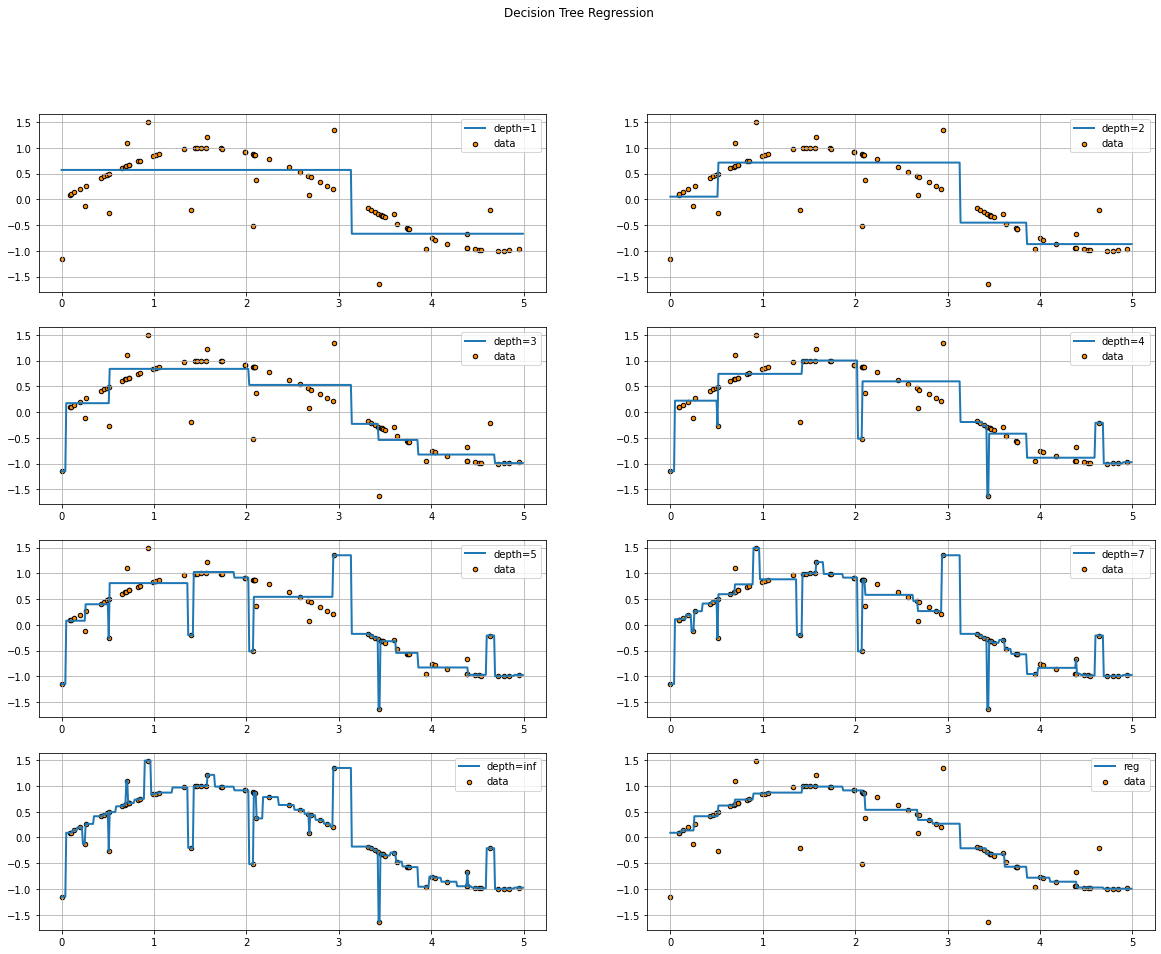

In [ ]:
# Plot the results

fig, axa = plt.subplots(4,2, figsize=(20,15))
for i, (key , cur_pred) in enumerate(pred_list.items()):
    ax = axa[i//2,i%2]
    ax.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
    ax.plot(X_test, cur_pred,label=f"{key}", linewidth=2)
    ax.grid()
    ax.legend()

fig.suptitle("Decision Tree Regression")
plt.show()

## 4. Оценка важности фичей

важность зависит от конкретного прогона классификатора, это не объективный показатель, но дающий представление

*попробуйте при разной глубине*

''

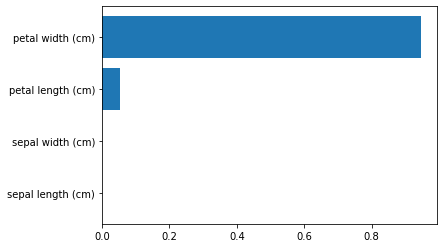

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)
''

## 4. Переообучение наглядно

*здесь я использую генерацию датасета из [блога](https://habrahabr.ru/company/ods/blog/322534/) open data science*

In [ ]:
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]
train_data = pd.DataFrame(train_data)

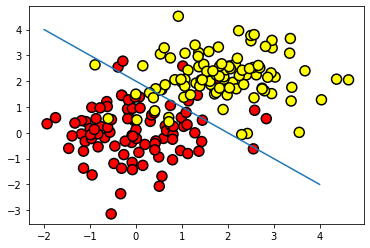

In [ ]:
plt.scatter(train_data[0], train_data[1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

*попробуйте при разной глубине*

In [ ]:
train_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

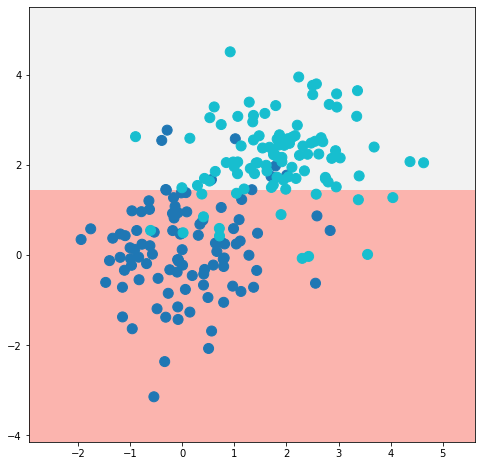

In [ ]:
clf = test_clf(DecisionTreeClassifier(max_depth=1), train_data, train_labels,cy=train_labels, fit_clf=True)

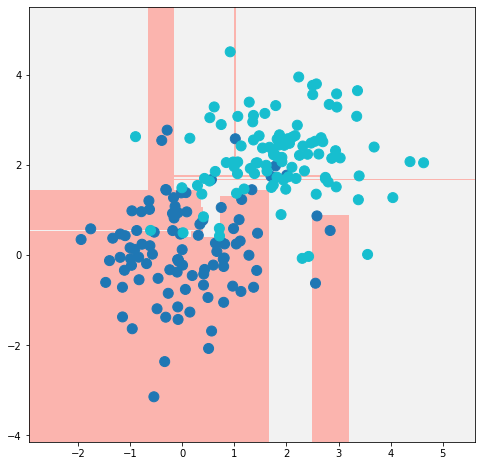

In [ ]:
clf = test_clf(DecisionTreeClassifier(criterion='gini'), train_data, train_labels,cy=train_labels, fit_clf=True)

А здесь можно увидеть огромное переобученное дерево: http://www.webgraphviz.com

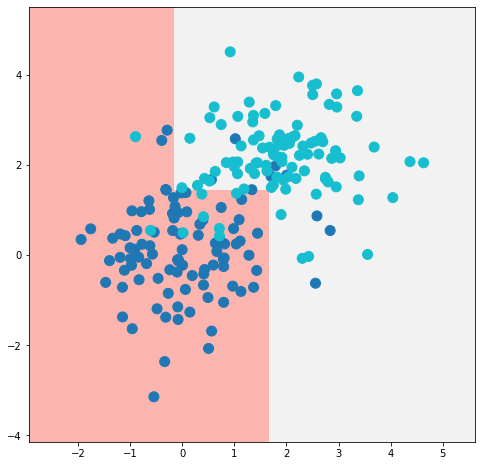

In [ ]:
clf = test_clf(DecisionTreeClassifier(max_depth=2), train_data, train_labels,cy=train_labels, fit_clf=True)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="y <= 1.463\ngini = 0.5\nsamples = 200\nvalue = [100, 100]", fillcolor="#ffffff"] ;
1 [label="x <= 1.673\ngini = 0.227\nsamples = 107\nvalue = [93, 14]", fillcolor="#e99457"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="y <= 0.403\ngini = 0.134\nsamples = 97\nvalue = [90, 7]", fillcolor="#e78b48"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 59\nvalue = [59, 0]", fillcolor="#e58139"] ;
2 -> 3 ;
4 [label="x <= 0.36\ngini = 0.301\nsamples = 38\nvalue = [31, 7]", fillcolor="#eb9d66"] ;
2 -> 4 ;
5 [label="y <= 0.568\ngini = 0.142\nsamples = 26\nvalue = [24, 2]", fillcolor="#e78c49"] ;
4 -> 5 ;
6 [label="y <= 0.55\ngini = 0.32\nsamples = 10\nvalue = [8, 2]", fillcolor="#eca06a"] ;
5 -> 6 ;
7 [label="x <= 0.005\ngini = 0.198\nsamples = 9\nvalue = [8, 1]", fillcolor="#e89152"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]", fillcolor="#e58139"] ;
7 -> 8 ;
9 [label="y <= 0.47\ngi

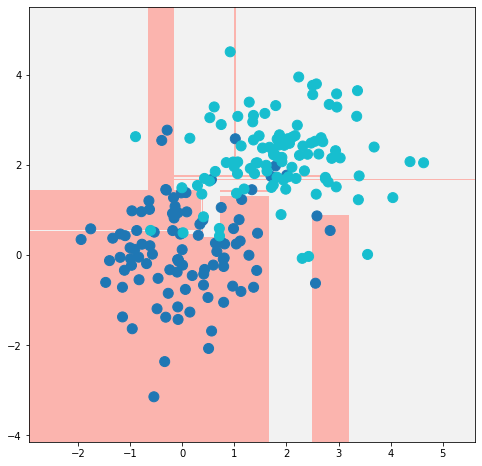

In [ ]:
clf = test_clf(DecisionTreeClassifier(max_depth=10), train_data, train_labels,cy=train_labels, fit_clf=True)
get_tree_dot_view(clf, feature_names=['x','y'])

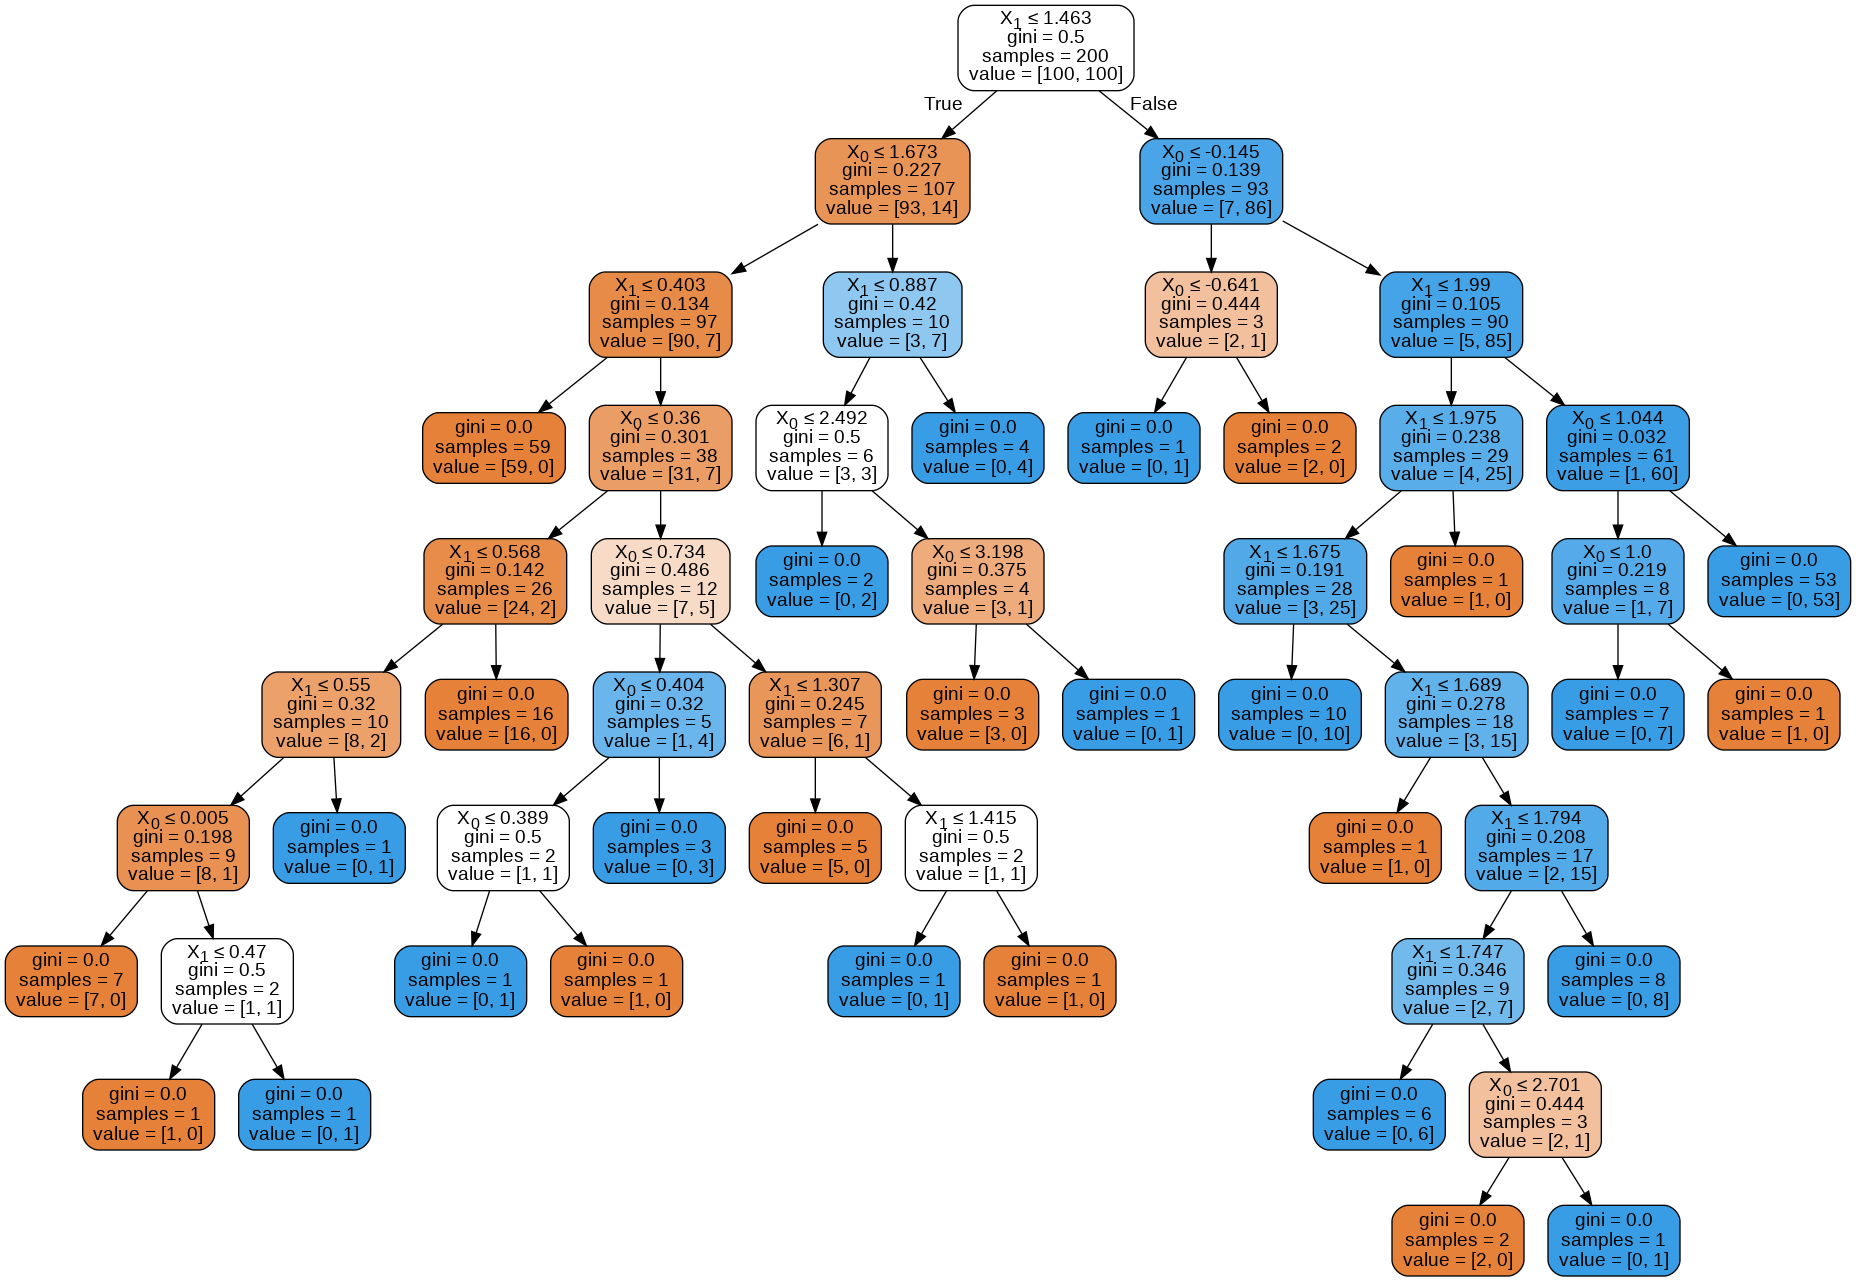

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<BarContainer object of 2 artists>

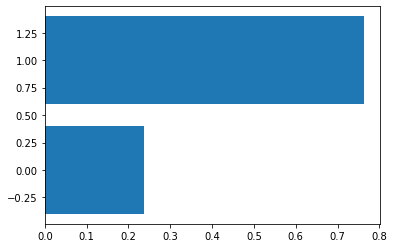

In [ ]:
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
